In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt

In [25]:
pima_df = pd.read_csv("pima-indians-diabetes-1.data",names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [27]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 Glucose,Blood Pressure ,Skin Thickness and Insulin can't be 0.

In [30]:
# replacing the 0 values of the impacted columns with the mean values
cols = ['Glucose','BloodPressure','SkinThickness','Insulin']
for i in cols:
    pima_df[i].replace(0,pima_df[i].mean(),inplace=True)
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [31]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# count the instances of each class in the data to check if data is skewed towards a class
pima_df.groupby(['class']).count()

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [18]:
sns.set_style("darkgrid")

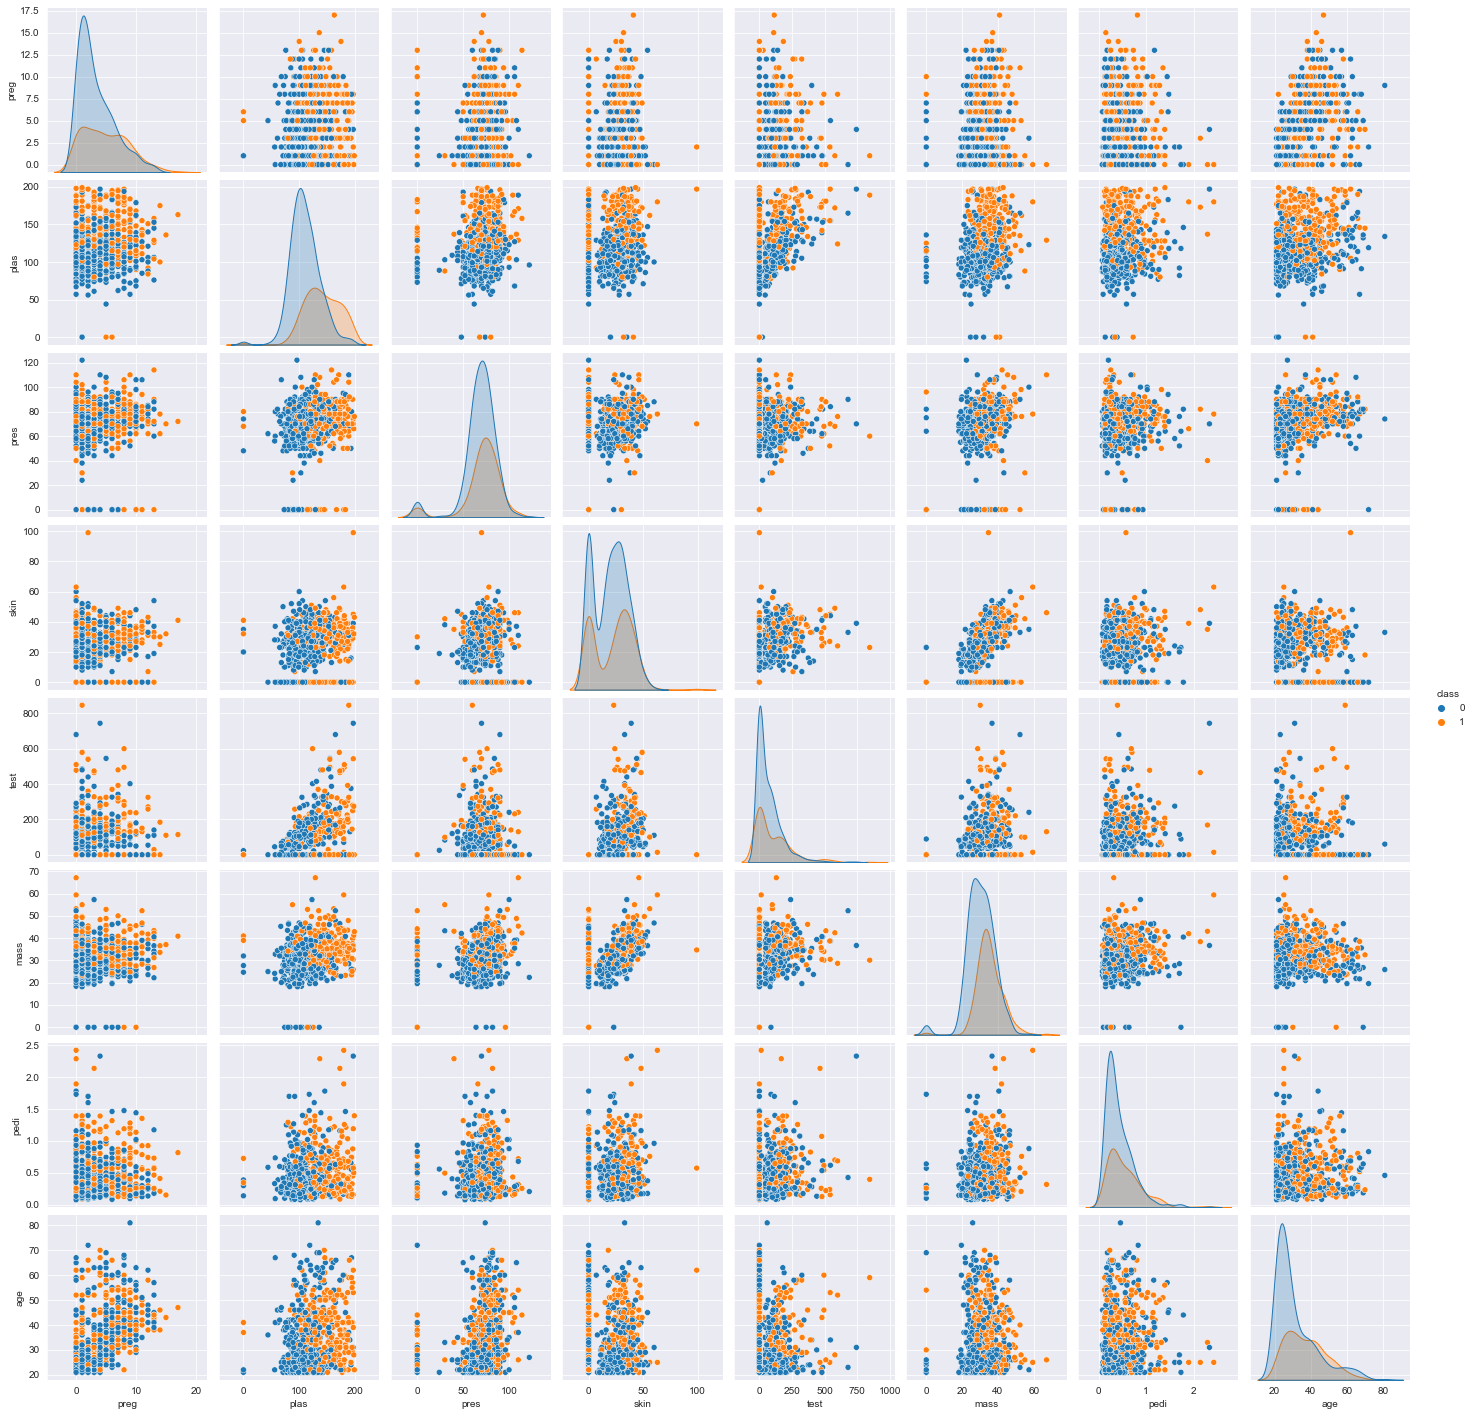

In [23]:
sns.pairplot(pima_df,hue='class')

# Distribution of Data

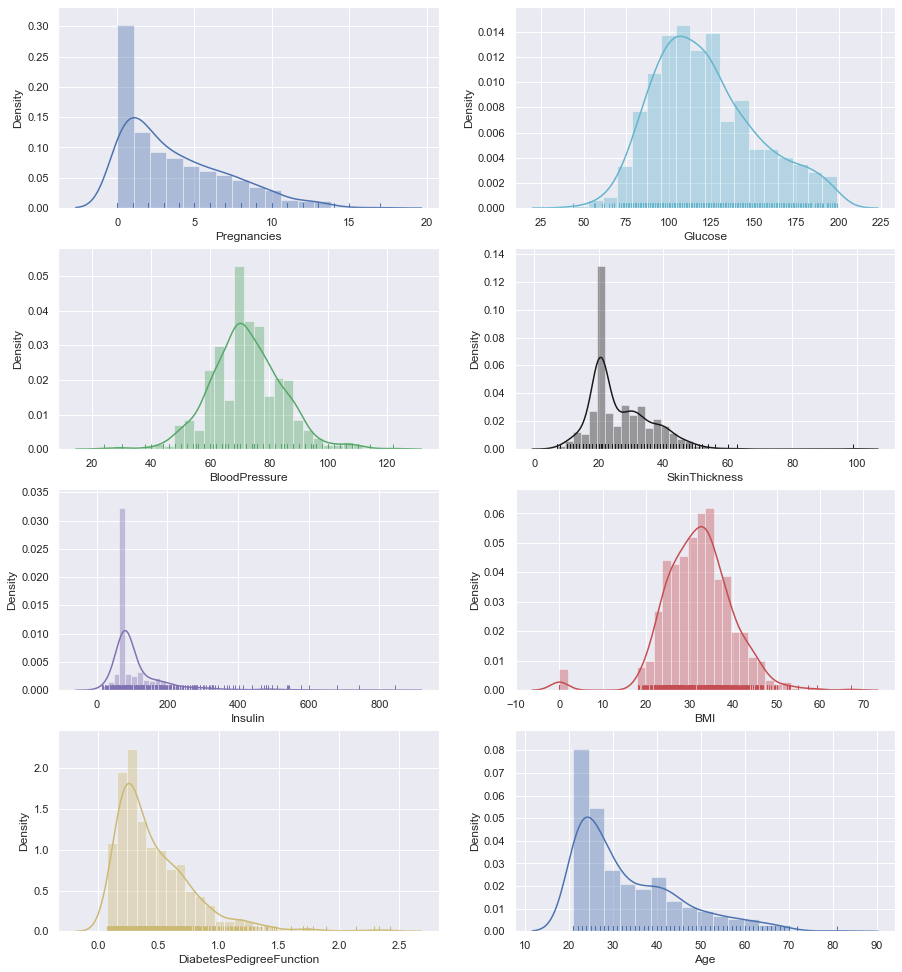

In [39]:
columns = pima_df.columns
columns = list(columns)
columns.pop()
colours = ['b','c','g','k','m','r','y','b']
sns.set(rc={'figure.figsize':(15,17)})
for i in range(len(columns)):
    plt.subplot(4,2,i+1)
    sns.distplot(pima_df[columns[i]], hist=True, rug=True, color=colours[i])

In [24]:
pima_df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [12]:
pima_df.isnull().sum()

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [16]:
array=pima_df.values
X = array[:,0:7] # select all rows and first 8 columns which are the attributes
Y = array[:,8]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.30,random_state=18)

In [40]:
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [44]:
LR = LogisticRegression(random_state = 1)
RFC = RandomForestClassifier(random_state = 1)
GNB = GaussianNB()
BGCL = BaggingClassifier(base_estimator = dt_model,n_estimators = 10,random_state = 1)
VC = VotingClassifier(estimators = [('lor', LR), ('rf', RFC), ('nb', GNB), ('bg', BGCL)], voting = 'hard')

In [45]:
for clf, label in zip([LR,RFC,GNB,BGCL,VC], ['Logistic Regression', 'RandomForest', 'NaiveBayes', 'Ensemble', 'Bagging']):
    scores = cross_val_score(clf, X, Y, cv=5, scoring='accuracy')
    print("Accuracy: %0.02f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label ))

Accuracy: 0.77 (+/- 0.02) [Logistic Regression]
Accuracy: 0.74 (+/- 0.02) [RandomForest]
Accuracy: 0.77 (+/- 0.02) [NaiveBayes]
Accuracy: 0.74 (+/- 0.02) [Ensemble]
Accuracy: 0.76 (+/- 0.02) [Bagging]
